## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

In [2]:
df = pd.read_csv(f'C:/Users/Skyline/solar-challenge-week1/data/togo-dapaong_qc.csv')

## Summary Statistics & Missing-Value Report

In [3]:
# Summary Statistics
print("Summary Statistics:")
display(df.describe())

# Missing Values
missing = df.isna().sum()
print("\nMissing Values:")
display(missing)
print("\nColumns with >5% Missing:")
display(missing[missing > len(df) * 0.05] / len(df))

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN



Missing Values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Columns with >5% Missing:


Comments    1.0
dtype: float64

## Outlier Detection & Basic Cleaning

In [5]:
# Compute Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Rows with outliers (|Z|>3): {outliers.sum()}")

# Impute missing values with median for key columns
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())

# Export cleaned DataFrame
df.to_csv(f'data/togo_clean.csv', index=False)

Rows with outliers (|Z|>3): 9251


## Time Series Analysis

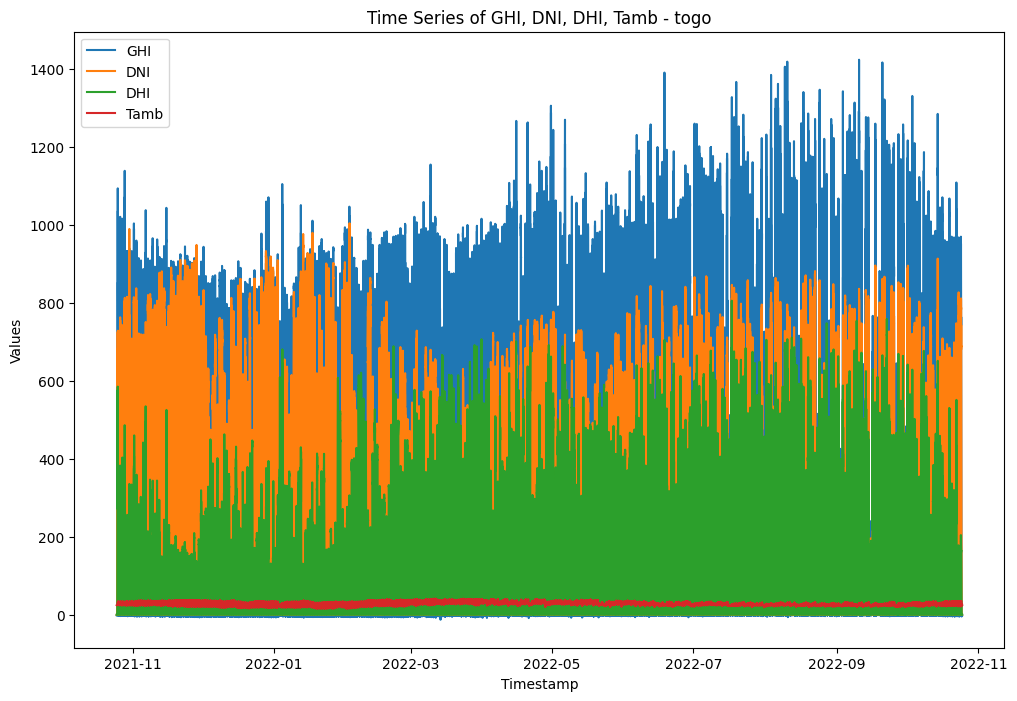

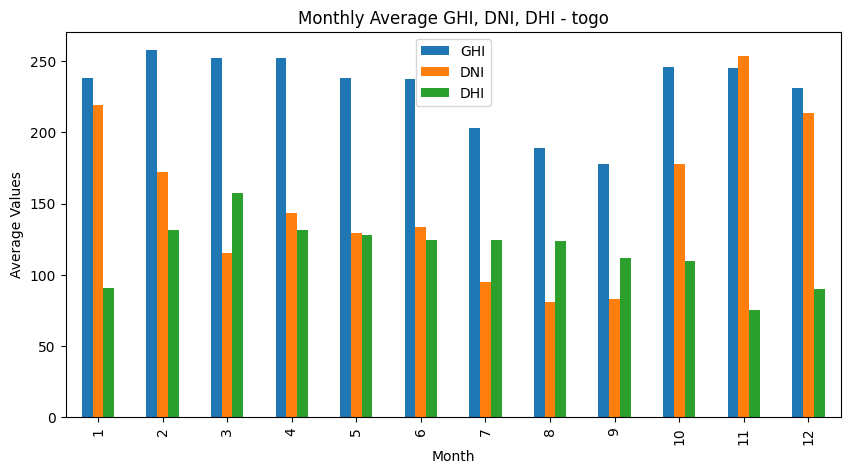

In [8]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title(f'Time Series of GHI, DNI, DHI, Tamb - togo')
plt.legend()
plt.show()

# Monthly trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title(f'Monthly Average GHI, DNI, DHI - togo')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()

## Correlation & Relationship Analysis

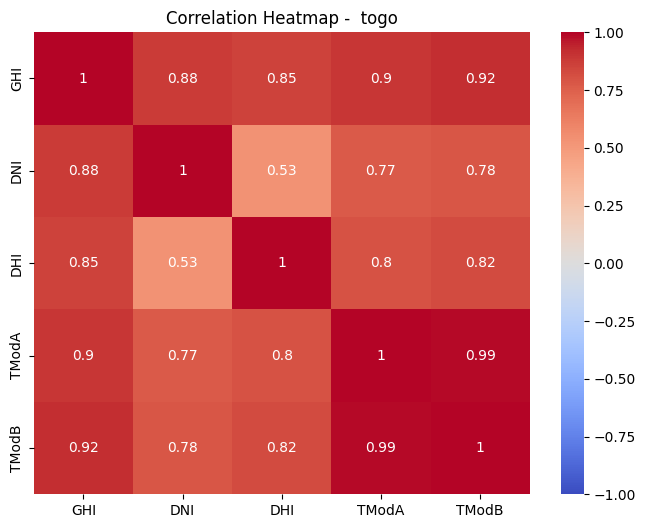

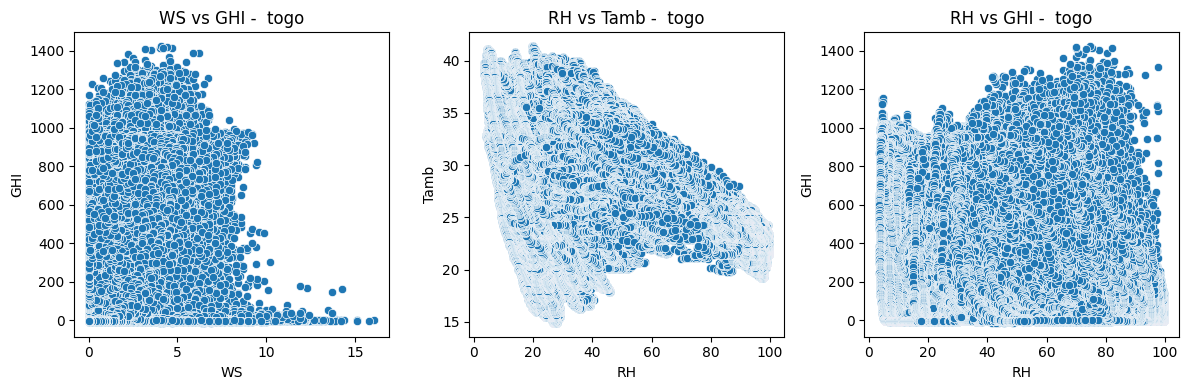

In [9]:
# Correlation heatmap
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap -  togo')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title(f'WS vs GHI -  togo')
plt.subplot(1, 3, 2)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title(f'RH vs Tamb -  togo')
plt.subplot(1, 3, 3)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title(f'RH vs GHI -  togo')
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis


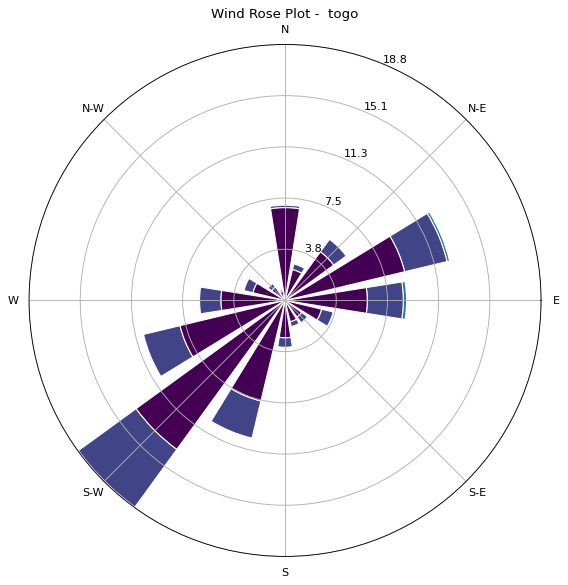

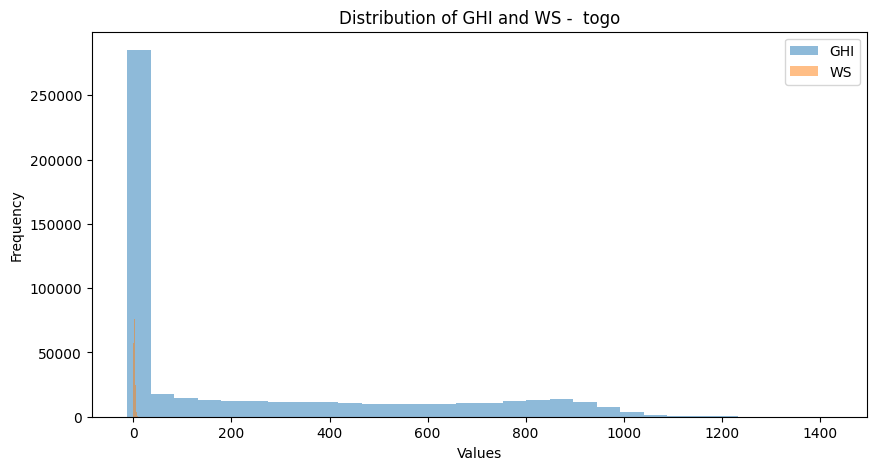

In [10]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
plt.title(f'Wind Rose Plot -  togo')
plt.show()

# Histograms
plt.figure(figsize=(10, 5))
plt.hist(df['GHI'], bins=30, alpha=0.5, label='GHI')
plt.hist(df['WS'], bins=30, alpha=0.5, label='WS')
plt.legend()
plt.title(f'Distribution of GHI and WS -  togo')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Temperature Analysis

In [11]:
# RH vs Tamb scatter plot (already included above, but add observations)
print("Observations on RH vs Tamb and GHI:")
print("- High RH may correlate with lower Tamb or GHI due to cloud cover.")

Observations on RH vs Tamb and GHI:
- High RH may correlate with lower Tamb or GHI due to cloud cover.


## Bubble Chart

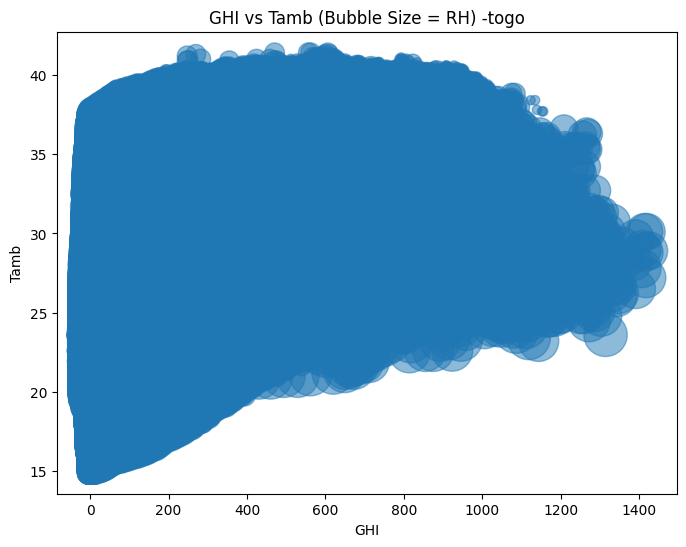

In [12]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title(f'GHI vs Tamb (Bubble Size = RH) -togo')
plt.show()